

*   **Task  - 2 : Movie Rating Prediction With PYTHON      
Name : Patel Riya Dharmendrabhai                    
Program : M.sc Data Science(sem-1)**






# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

# Getting the data

In [ ]:
movie = pd.read_csv('/content/movie.csv',encoding='ISO-8859-1')

In [ ]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Inforamtion of data

In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movie.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [ ]:
movie.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Data Types

In [ ]:
movie.dtypes

,0
Name,object
Year,object
Duration,object
Genre,object
Rating,float64
Votes,object
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


# Checking shape of data

In [ ]:
movie.shape

(15509, 10)

In [ ]:
movie.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


# Checking Null values

In [ ]:
movie.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


# Dealing with missing values

In [ ]:
movie.dropna(subset=['Rating'],inplace=True)

In [ ]:
movie.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
movie['Genre'].fillna('Unknown', inplace=True)

<ipython-input-15-7b9ff375aa94>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie['Genre'].fillna('Unknown', inplace=True)


In [ ]:
movie.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,0
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
movie['Duration'] = movie['Duration'].str.extract('(\d+)').astype(float)
movie['Duration'].fillna(movie['Duration'].median(), inplace=True)

<ipython-input-37-62336bd21fe2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie['Duration'].fillna(movie['Duration'].median(), inplace=True)


In [ ]:
movie.dropna(subset=['Actor 1','Actor 2','Actor 3'],inplace=True)

In [ ]:
movie.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


# Checking duplicate value

In [ ]:
movie.duplicated().sum()

0

In [ ]:
movie.dtypes

,0
Name,object
Year,int64
Duration,float64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


# Replacing string to integer

In [ ]:
movie['Year'] = movie['Year'].astype(str).str.extract(r'(\d+)').astype(int)

In [ ]:
movie['Votes'] = movie['Votes'].astype(str).str.extract(r'(\d+)').astype(int)

In [ ]:
movie.dtypes

,0
Name,object
Year,int64
Duration,float64
Genre,object
Rating,float64
Votes,int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


In [ ]:
movie.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


## Checking Outliers

Boxplot

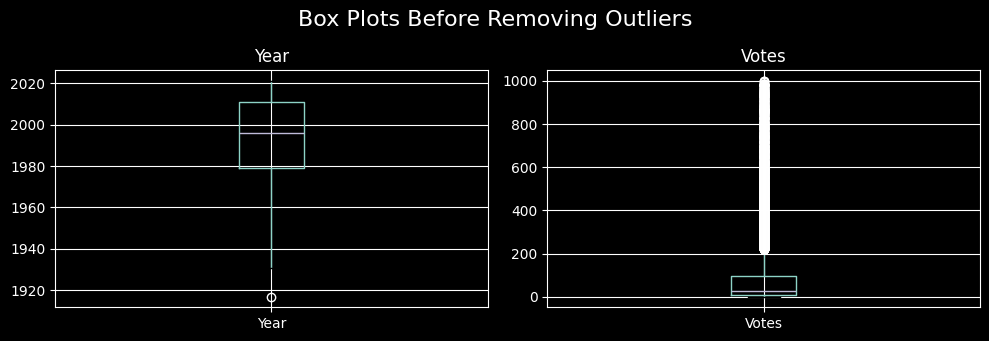

Number of rows with outliers before removal: 781


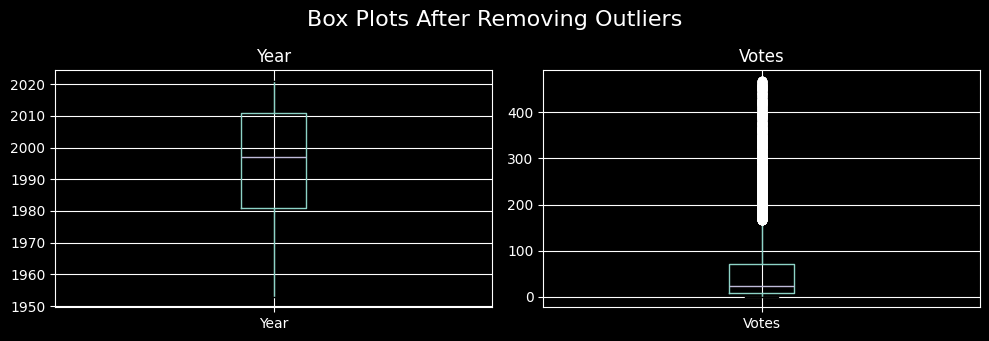

Number of rows after removing outliers: 6846


In [ ]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['Year', 'Votes']

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    movie.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (movie[column] - movie[column].mean()) / movie[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
movie = movie[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    movie.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(movie))

# Distribution of data

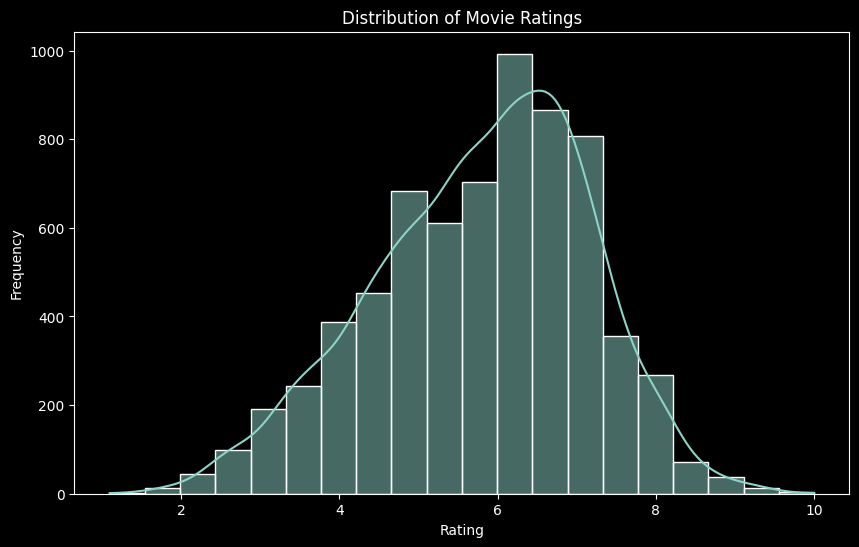

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=movie,x='Rating',bins=20,kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

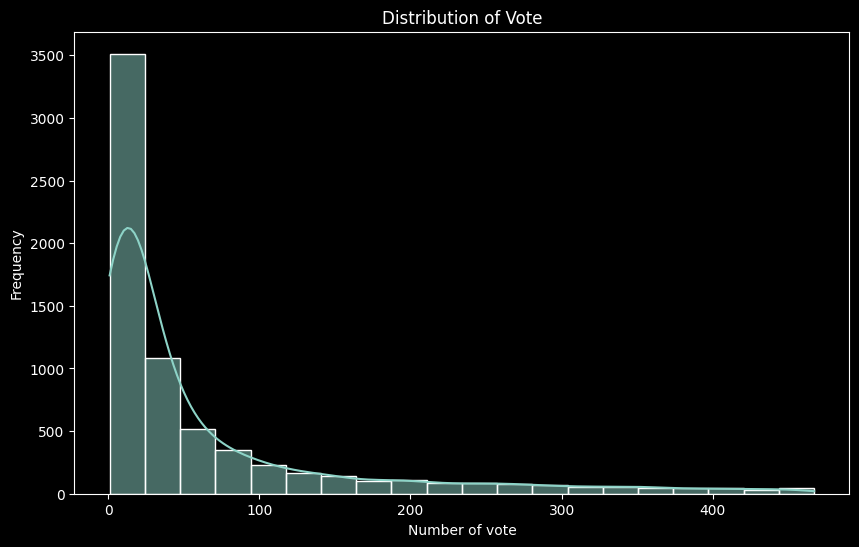

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=movie,x='Votes',bins=20,kde=True)
plt.title('Distribution of Vote')
plt.xlabel('Number of vote')
plt.ylabel('Frequency')
plt.show()

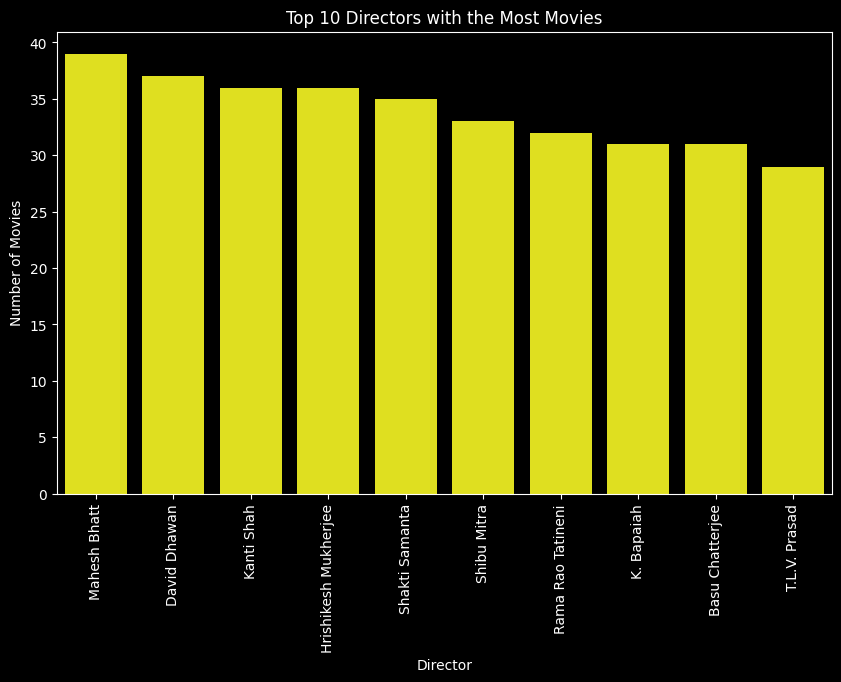

In [ ]:
movie_director = movie['Director'].value_counts().head(10)
movie_director
plt.figure(figsize=(10,6))
sns.barplot(x=movie_director.index,y=movie_director.values,color='yellow')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

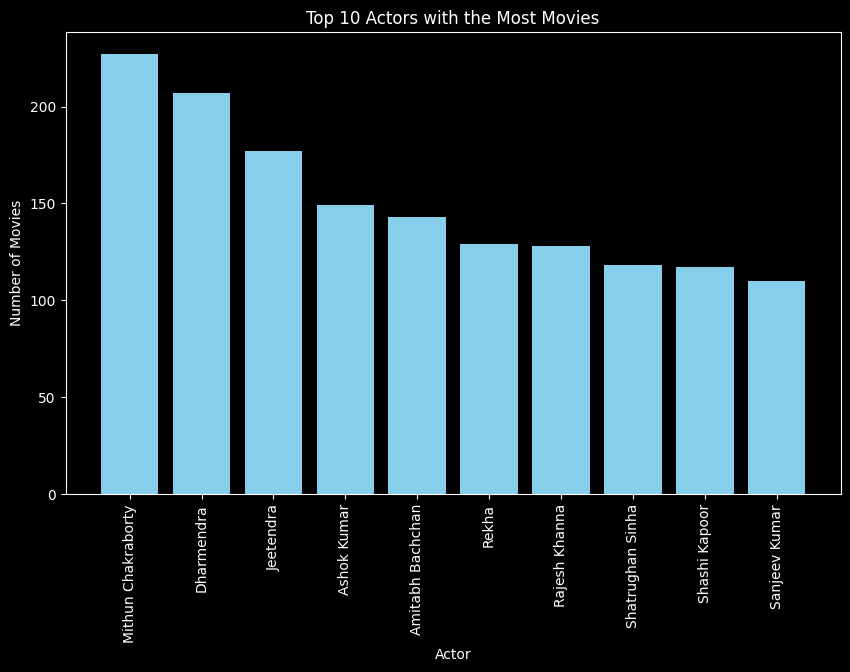

In [ ]:
movie_actor = movie[['Actor 1','Actor 2','Actor 3']].stack().value_counts().head(10)
movie_actor
plt.figure(figsize=(10,6))
plt.bar(movie_actor.index,movie_actor.values,color='skyblue')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

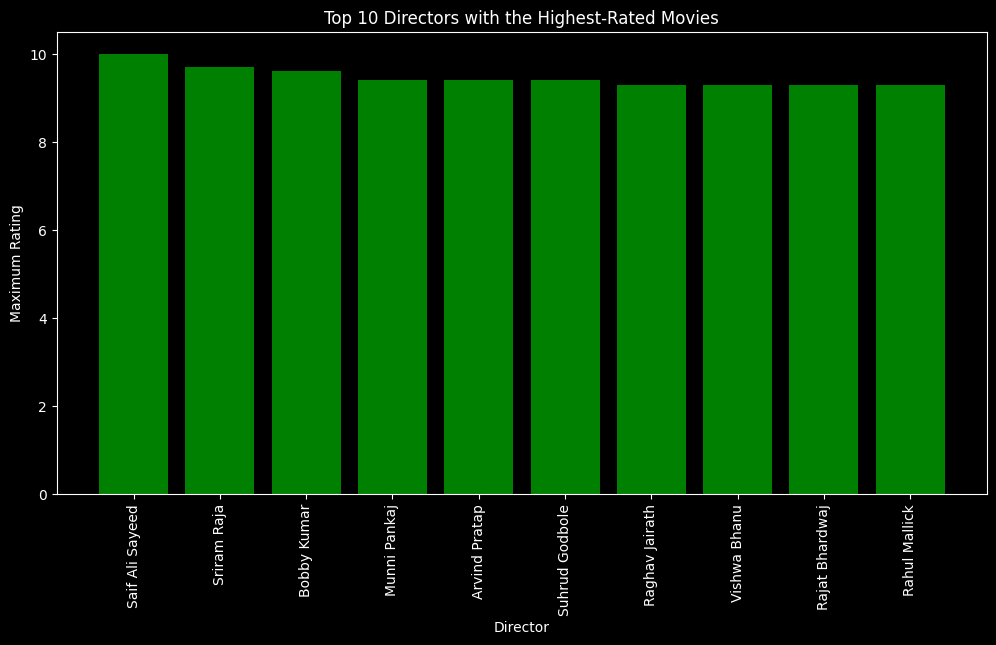

In [ ]:
max_rating = movie.groupby('Director')['Rating'].max()

top_10_directors = max_rating.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values,color="green")
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()

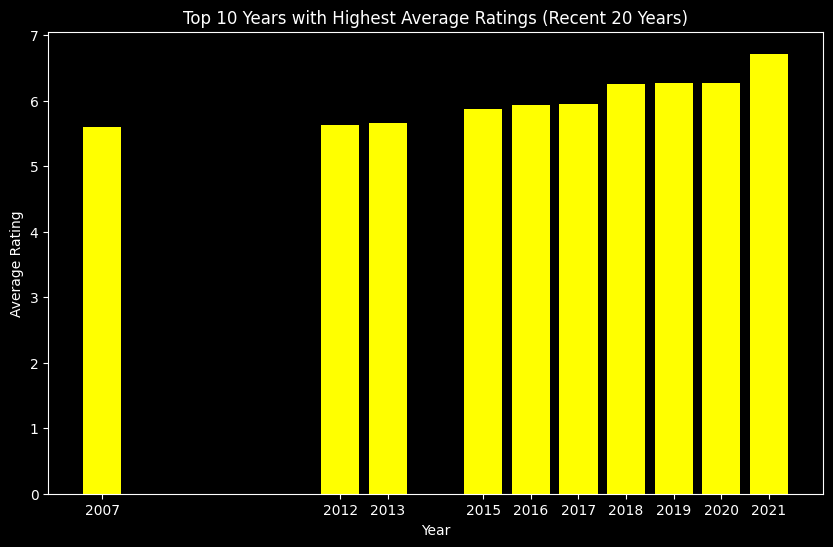

In [ ]:
recent_years = movie[movie['Year'] >= (max(movie['Year']) - 19)]
average_ratings = recent_years.groupby('Year')['Rating'].mean().reset_index()
top_10_years = average_ratings.nlargest(10, 'Rating')
plt.figure(figsize=(10, 6))
plt.bar(top_10_years['Year'], top_10_years['Rating'],color='yellow')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Top 10 Years with Highest Average Ratings (Recent 20 Years)')
plt.xticks(top_10_years['Year'])
plt.show()

# Correlation Matrix

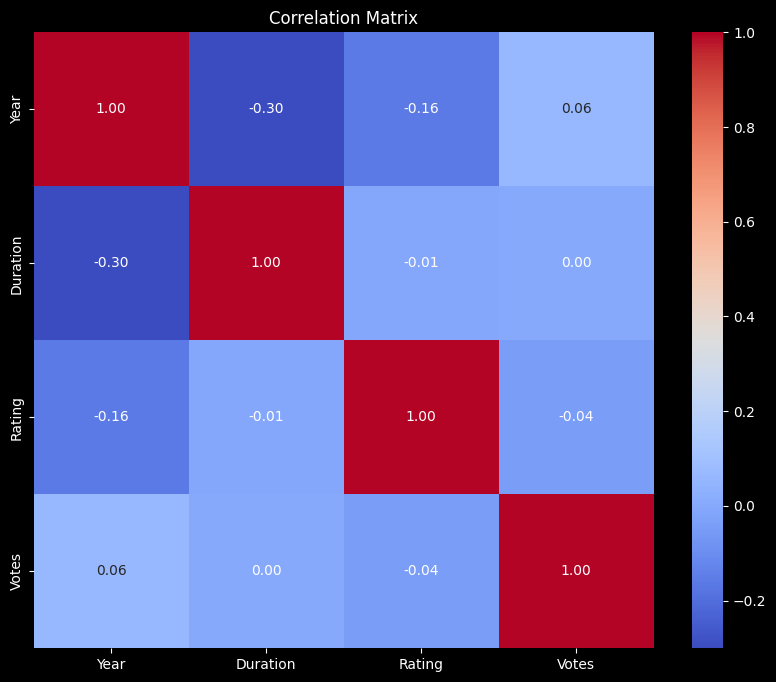

In [ ]:
corr_matrix = movie.select_dtypes(include=np.number).corr() # Select only numeric columns for correlation calculation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pair plots

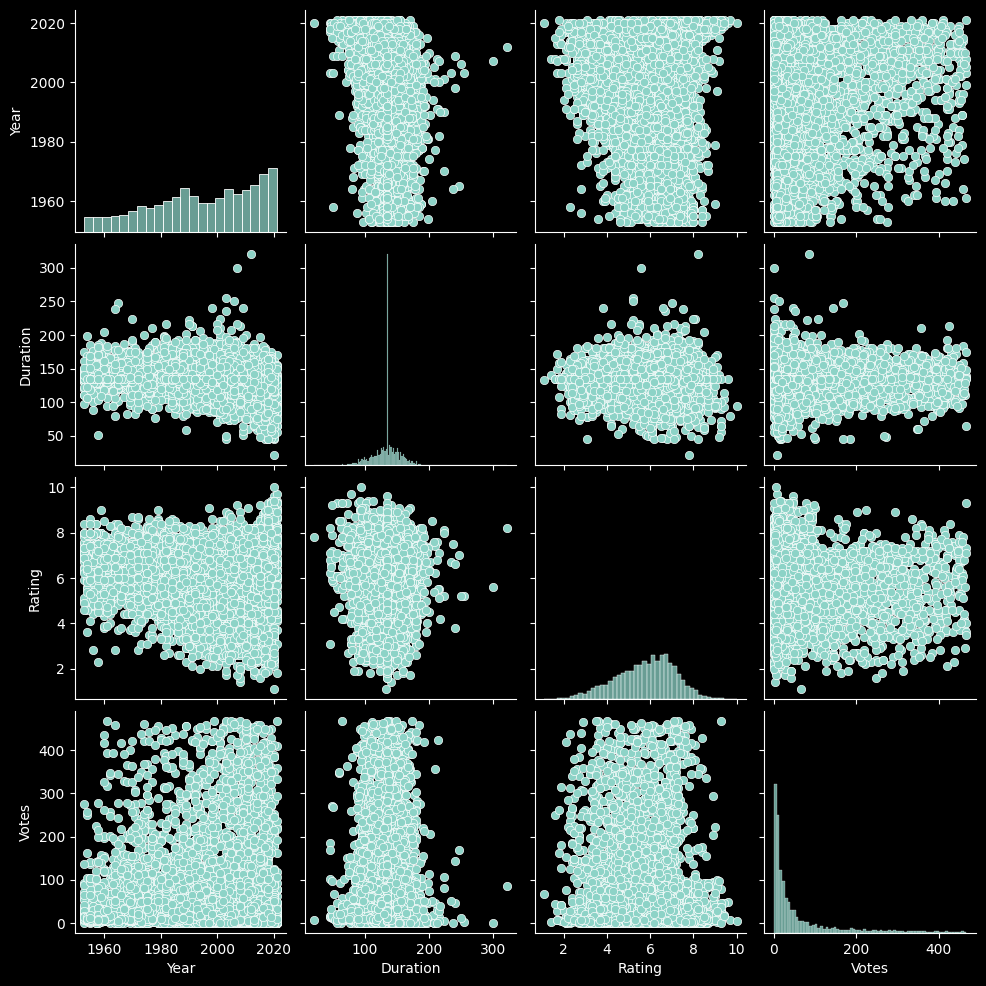

In [ ]:
# Select the numerical variables for the pair plot
numerical_columns = movie.select_dtypes(include=['number'])

# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()

In [ ]:
x = movie.drop('Rating',axis=1)
y = movie['Rating']

In [ ]:
x.head()

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116.0,"Action, Crime, Thriller",11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
x.corr

<bound method DataFrame.corr of                                      Name  Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019     109.0   
3                                 #Yaaram  2019     110.0   
6                               ...Yahaan  2005     142.0   
8                      ?: A Question Mark  2012      82.0   
9                                @Andheri  2014     116.0   
...                                   ...   ...       ...   
15498                       Zulm Ka Badla  1985     135.0   
15501                     Zulm Ki Hukumat  1992     135.0   
15503                     Zulm Ki Zanjeer  1989     125.0   
15504                 Zulm Ko Jala Doonga  1988     135.0   
15508                        Zulm-O-Sitam  1998     130.0   

                           Genre  Votes           Director           Actor 1  \
1                          Drama      8      Gaurav Bakshi      Rasika Dugal   
3                Comedy, Romance     35         Ovais Khan           Prateik   
6            Drama, Romance, War      1     Shoojit Sircar   Jimmy Sheirgill   
8      Horror, Mystery, Thriller    326      Allyson Patel         Yash Dave   
9        Action, Crime, Thriller     11  Biju Bhaskar Nair         Augustine   
...                          ...    ...                ...               ...   
15498       Action, Crime, Drama     11              Chand         K. Prasad   
15501       Action, Crime, Drama    135  Bharat Rangachary        Dharmendra   
15503       Action, Crime, Drama     44    S.P. Muthuraman       Chiranjeevi   
15504                     Action     11      Mahendra Shah  Naseeruddin Shah   
15508              Action, Drama     20       K.C. Bokadia        Dharmendra   

                   Actor 2          Actor 3  
1           Vivek Ghamande    Arvind Jangid  
3               Ishita Raj  Siddhant Kapoor  
6           Minissha Lamba   Yashpal Sharma  
8           Muntazir Ahmad     Kiran Bhatia  
9             Fathima Babu             Byon  
...                    ...              ...  
15498        Rakesh Roshan        Anita Raj  
15501  Moushumi Chatterjee          Govinda  
15503           Jayamalini      Rajinikanth  
15504        Sumeet Saigal    Suparna Anand  
15508           Jaya Prada      Arjun Sarja  

[6846 rows x 9 columns]>

In [ ]:
movie.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
categorical_columns = ['Name', 'Genre', 'Director','Actor 1', 'Actor 2', 'Actor 3']
ohe = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output' to match the current scikit-learn API.

x_categorical_encoded = ohe.fit_transform(x[categorical_columns])

feature_names = []
for i, col in enumerate(categorical_columns):
    categories = ohe.categories_[i]
    for category in categories:
        feature_names.append(f"{col}_{category}")

x_categorical_encoded_movie = pd.DataFrame(x_categorical_encoded, columns=feature_names)
x_categorical_encoded_movie.head()

,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,Name_12 O'Clock,Name_127 B,Name_13B: Fear Has a New Address,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
numerical_columns = ['Year', 'Duration', 'Votes']
scaler = MinMaxScaler()
x_numerical_scaled = scaler.fit_transform(x[numerical_columns])
x_numerical_scaled_movie = pd.DataFrame(x_numerical_scaled, columns=numerical_columns)

In [ ]:
x_numerical_scaled_movie.head()

,Year,Duration,Votes
0,0.970588,0.293333,0.015021
1,0.970588,0.296667,0.072961
2,0.764706,0.403333,0.000000
3,0.867647,0.203333,0.697425
4,0.897059,0.316667,0.021459


In [ ]:
x_final = pd.concat([x_numerical_scaled_movie, x_categorical_encoded_movie], axis=1)
x_final.head()

,Year,Duration,Votes,Name_#Gadhvi (He thought he was Gandhi),Name_#Yaaram,Name_'Ferry',Name_'Sambandh',Name_...Yahaan,Name_102 Not Out,Name_10ml LOVE,...,Actor 3_Zareen Khan,Actor 3_Zarina Wahab,Actor 3_Zarine Ali,Actor 3_Zayed Khan,Actor 3_Zeenat Aman,Actor 3_Zeeshan Khan,Actor 3_Zeishan Quadri,Actor 3_Zenobia Shroff,Actor 3_Zoya Hussain,Actor 3_Zulfi Sayed
0,0.970588,0.293333,0.015021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.970588,0.296667,0.072961,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.764706,0.403333,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.867647,0.203333,0.697425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.897059,0.316667,0.021459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(movie['Rating'].values.reshape(-1, 1))
y = pd.DataFrame(y_scaled, columns=['Rating'])
y

,Rating
0,0.662921
1,0.370787
2,0.707865
3,0.505618
4,0.325843
...,...
6841,0.426966
6842,0.471910
6843,0.528090
6844,0.393258


# Train and Test Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_test = lr_model.predict(x_test)
y_pred_train = lr_model.predict(x_train)

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

In [ ]:
print(f"Test mean square error : {mse_test}")
print(f"Train mean square error : {mse_train}")
print(f"Test r2 score : {r2_test}")
print(f"Train r2 score : {r2_train}")

Test mean square error : 0.019851296287494644
Train mean square error : 1.4724802197541506e-30
Test r2 score : 0.1417813519729877
Train r2 score : 1.0


Text(0, 0.5, 'Predicted Rating')

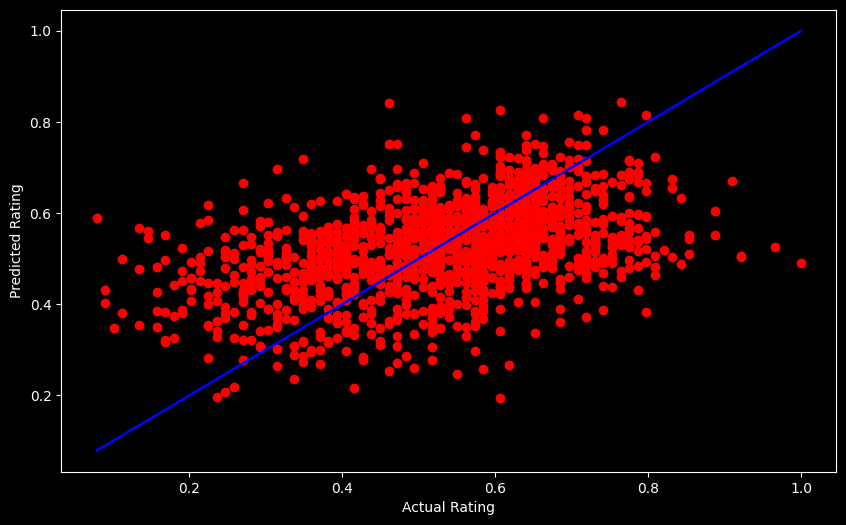

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')

# Conclusion

The film industry can benifit from these findings to make data driven decisions regarding movie production,casting and marketing.